In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

In [55]:
df = pd.read_csv("entropy2.csv")
df = df[[col for col in df.columns if "param" in col or "value" in col]]
rename_dict = {c:c.replace("params_", "") for c in df.columns}
df = df.rename(columns=rename_dict)
y = df['value']
df

,value,D1_freq,D1_weight,D2_freq,D2_weight,FSNtoD1_w,FSNtoD2_w,delay_delta,weight_delta
0,6.264472,1109.735265,0.396747,1082.131929,0.494230,7.361288,5.566143,0.176948,0.322680
1,5.689438,1260.544774,0.459288,962.615437,0.525866,7.125110,3.819402,0.406477,0.209117
2,5.168608,1036.140519,0.494897,993.249567,0.499184,6.855052,4.649654,0.305919,0.486534
3,6.321507,1023.293210,0.483984,915.318403,0.357045,7.356889,3.975606,0.379318,0.631107
4,5.665595,1204.248097,0.359791,966.580345,0.421301,6.720121,5.257386,0.230661,0.963318
...,...,...,...,...,...,...,...,...,...
245,3.789933,1287.450345,0.547320,1078.730671,0.472175,5.683606,5.711098,0.248442,0.451026
246,3.370594,1289.049070,0.425141,1079.906809,0.473793,5.687961,5.715435,0.193622,0.490958
247,2.473356,1289.390134,0.537297,1083.803870,0.472496,5.602888,5.612527,0.182860,0.490182
248,2.890613,1299.937815,0.535977,1084.984799,0.482958,5.764470,5.416635,0.196103,0.553366


In [9]:
from umap import UMAP

In [17]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(dfX.values)
reducer = UMAP(n_neighbors=10)
embedding = reducer.fit_transform(X)

/home/dianloo/Desktop/tesi/quilt/venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


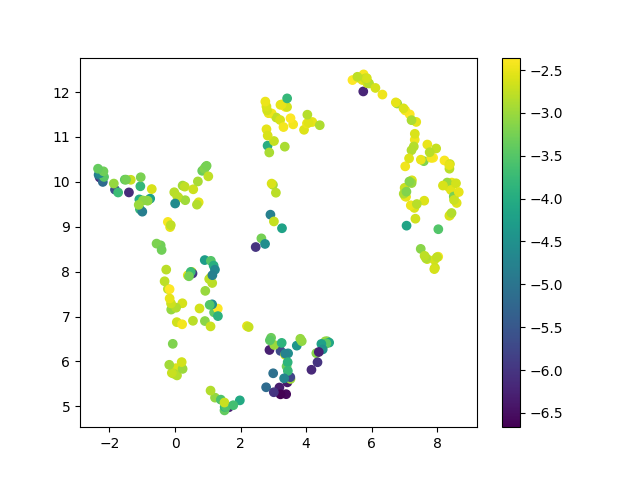

In [50]:
fig,ax = plt.subplots()
plt.scatter(*(embedding.T), c=-y)
plt.colorbar()
plt.show()

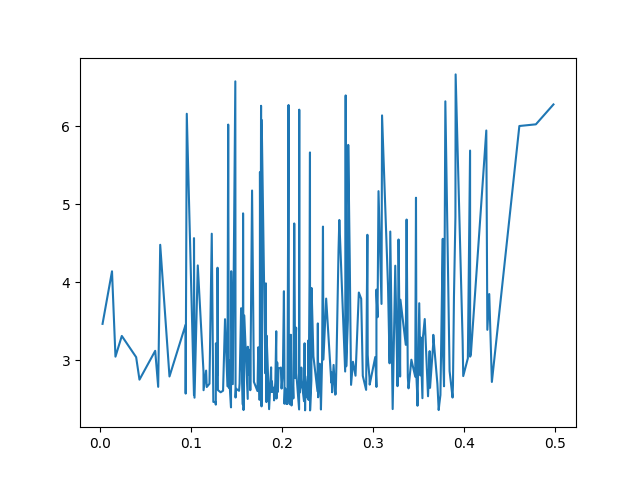

In [58]:
fig,ax = plt.subplots()
x = df['delay_delta']
argso = np.argsort(x)
plt.plot(x[argso], y[argso])
plt.show()

In [49]:
df.corr()

,value,D1_freq,D1_weight,D2_freq,D2_weight,FSNtoD1_w,FSNtoD2_w,delay_delta,weight_delta
value,1.000000,-0.504241,-0.597535,-0.578815,-0.305171,0.498683,-0.361462,0.192628,-0.058420
D1_freq,-0.504241,1.000000,0.254353,0.329956,0.112042,-0.495791,0.293339,-0.128865,0.045337
D1_weight,-0.597535,0.254353,1.000000,0.339906,-0.005246,-0.367315,0.158744,-0.131020,-0.088451
D2_freq,-0.578815,0.329956,0.339906,1.000000,0.078951,-0.322408,0.471122,-0.056618,0.242743
D2_weight,-0.305171,0.112042,-0.005246,0.078951,1.000000,-0.089133,0.171985,0.104982,0.146127
FSNtoD1_w,0.498683,-0.495791,-0.367315,-0.322408,-0.089133,1.000000,-0.312108,0.239997,-0.096790
FSNtoD2_w,-0.361462,0.293339,0.158744,0.471122,0.171985,-0.312108,1.000000,0.072860,0.249131
delay_delta,0.192628,-0.128865,-0.131020,-0.056618,0.104982,0.239997,0.072860,1.000000,0.156935
weight_delta,-0.058420,0.045337,-0.088451,0.242743,0.146127,-0.096790,0.249131,0.156935,1.000000


In [57]:
df.iloc[np.argmin(df.value)]

value              2.354851
D1_freq         1282.987407
D1_weight          0.549934
D2_freq         1070.480828
D2_weight          0.482153
FSNtoD1_w          5.717419
FSNtoD2_w          5.605281
delay_delta        0.230784
weight_delta       0.494563
Name: 220, dtype: float64